* pycon2016
* Basic Statistics with Python
* https://github.com/pythonkr/pyconapac-2016-files/raw/master/20160813-105-12-ArisBudiWibowo.pdf

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

In [1] used 16.0625 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 97.17 MiB


In [2]:
np.random.seed(0)
s = sp.randn(10)
print (s)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
In [2] used 0.4648 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 97.63 MiB


In [3]:
print("Mean: {0:8.6f}".format(s.mean()))
print("Variance: {0:8.6f}".format(s.var()))
print("Standard Deviation: {0:8.6f}".format(s.std()))
print("Min: {0:8.6f}".format(s.min()))
print("Max: {0:8.6f}".format(s.max()))
print("Range: {0:8.6f}".format(np.ptp(s))) # peek to peek

Mean: 0.738023
Variance: 0.935242
Standard Deviation: 0.967079
Min: -0.977278
Max: 2.240893
Range: 3.218171
In [3] used 0.0547 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 97.69 MiB


In [4]:
print("Mean: {0:8.6f}".format(sp.mean(s)))
print("Variance: {0:8.6f}".format(sp.var(s)))
print("Standard Deviation: {0:8.6f}".format(sp.std(s)))

sp.stats.describe(s)

Mean: 0.738023
Variance: 0.935242
Standard Deviation: 0.967079


DescribeResult(nobs=10, minmax=(-0.97727787987641102, 2.2408931992014578), mean=0.73802317072883472, variance=1.0391580005558709, skewness=-0.05309450487507253, kurtosis=-0.982036296214218)

In [4] used 0.0742 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 97.76 MiB


In [5]:
data = pd.DataFrame(data={'s': s})
data.describe()

,s
count,10.000000
mean,0.738023
std,1.019391
min,-0.977278
25%,0.022625
50%,0.680343
75%,1.567724
max,2.240893


In [5] used 0.5547 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 98.32 MiB


* binomial

In [6]:
%matplotlib inline

In [6] used 0.2148 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 98.53 MiB


/Users/1003946/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/1003946/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/1003946/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


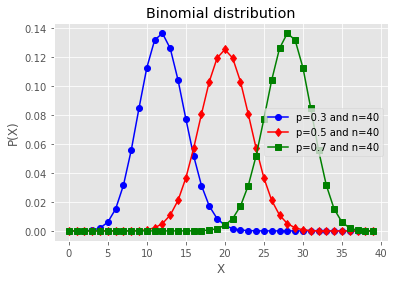

In [7] used 7.2305 MiB RAM in 0.41s, peaked 0.00 MiB above current, total RAM usage 105.76 MiB


In [7]:
bd1 = sp.stats.binom(40, 0.3)
bd2 = sp.stats.binom(40, 0.5)
bd3 = sp.stats.binom(40, 0.7)

k = np.arange(40)

plt.plot(k, bd1.pmf(k), 'o-b')
plt.hold(True)
plt.plot(k, bd2.pmf(k), 'd-r')
plt.plot(k, bd3.pmf(k), 's-g')
plt.title('Binomial distribution')
plt.legend(['p=0.3 and n=40', 'p=0.5 and n=40', 'p=0.7 and n=40'])
plt.xlabel('X')
plt.ylabel('P(X)')

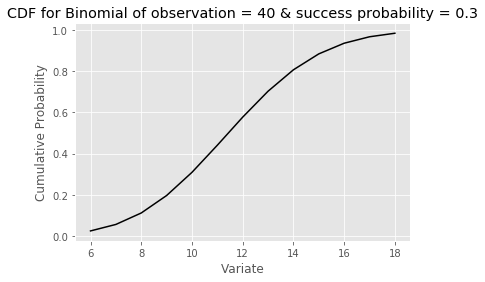

In [8] used 2.9531 MiB RAM in 0.28s, peaked 0.00 MiB above current, total RAM usage 108.71 MiB


In [8]:
def binom_cdf(n, p):
    x = np.arange(sp.stats.binom.ppf(0.01, n, p),
                  sp.stats.binom.ppf(0.99, n, p))
    
    y = sp.stats.binom.cdf(x, n, p)
    plt.plot(x, y, color='black')
    plt.xlabel('Variate')
    plt.ylabel('Cumulative Probability')
    plt.title('CDF for Binomial of observation = {0} & success probability = {1}'.format(n, p))
    
    
binom_cdf(40, 0.3)

* normal distribution

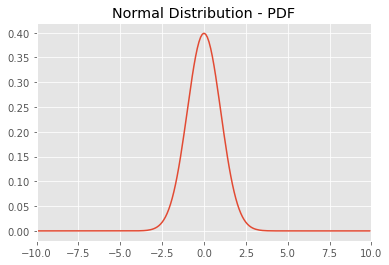

In [9] used 2.2383 MiB RAM in 0.28s, peaked 0.00 MiB above current, total RAM usage 110.95 MiB


In [9]:
x = np.arange(-10, 10, 0.1)
n1 = sp.stats.norm(0, 1)
plt.plot(x, n1.pdf(x))
plt.xlim([-10, 10])
plt.title('Normal Distribution - PDF')

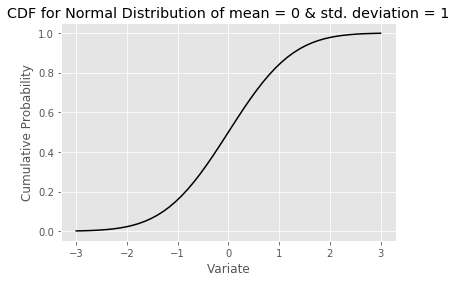

In [10] used 2.6914 MiB RAM in 0.27s, peaked 0.00 MiB above current, total RAM usage 113.64 MiB


In [10]:
def norm_cdf(mean=0, std=1):
    x = sp.linspace(-3*std, 3*std, 50)
    y = sp.stats.norm.cdf(x, loc=mean, scale=std)
    plt.plot(x, y, color='black')
    plt.xlabel('Variate')
    plt.ylabel('Cumulative Probability')
    plt.title('CDF for Normal Distribution of mean = {0} & std. deviation = {1}'.format(mean, std))
    
    
norm_cdf()

* data imputation

In [11]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score

dataset = load_boston()
rng = np.random.RandomState(0)
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

print(n_samples, n_features)

(506, 13)
In [11] used 3.6641 MiB RAM in 0.24s, peaked 0.00 MiB above current, total RAM usage 117.31 MiB


/Users/1003946/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full).mean()
print("Score with the entire dataset = %.2f" % score)

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = np.floor(n_samples * missing_rate)
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                      dtype=np.bool),
                             np.ones(n_missing_samples, dtype=np.bool)))
rng.shuffle(missing_samples)
missing_features = rng.randint(0, n_features, n_missing_samples)

Score with the entire dataset = 0.56
In [12] used 5.1875 MiB RAM in 1.37s, peaked 0.00 MiB above current, total RAM usage 122.50 MiB


/Users/1003946/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/1003946/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/1003946/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [23]:
# Estimate the score without the lines containing missing values
X_filtered = X_full[~missing_samples, :]
y_filtered = y_full[~missing_samples]
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_filtered, y_filtered).mean()
print("Score without the samples containing missing values = %.2f" % score)

# Estimate the score after imputation of the missing values
X_missing = X_full.copy()
X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y_full.copy()
estomator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean", axis=0)),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score without the samples containing missing values = 0.48
Score after imputation of the missing values = 0.51
In [23] used 2.4375 MiB RAM in 2.10s, peaked 0.00 MiB above current, total RAM usage 129.57 MiB
